In [2]:
import torch
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import cv2
import supervision as sv

In [3]:
DEVICE = 'cuda:0'
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = './SAM/sam_vit_h_4b8939.pth'

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

mask_generator = SamAutomaticMaskGenerator(sam)
print('model get')

model get


In [5]:
IMAGE_PATH = './dataset/test.jpg'
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(image_bgr, detections)
print(annotated_image.shape)
#

(1080, 1080, 3)


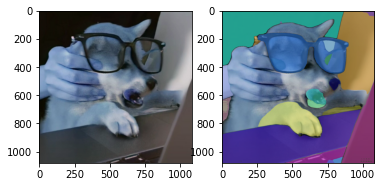

In [12]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(image_bgr)

plt.subplot(1, 2, 2)
plt.imshow(annotated_image)